# Hypercube Line Picking (Monte‑Carlo)

A **Jupyter Notebook** to estimate the average Euclidean distance between two random points in an $n$‑dimensional unit hypercube (for $n = 1 \dots 30$) using NumPy‑vectorised Monte‑Carlo sampling.

Feel free to modify the parameters at the top (number of dimensions, trials, and random seed) and re‑run the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class HypercubeLinePicker:
    """Monte‑Carlo estimator for average inter‑point distance in an n‑D hypercube."""

    def __init__(self, max_dim: int = 30, trials: int = 10_000, seed: int | None = None):
        self.max_dim = max_dim
        self.trials = trials
        self.rng = np.random.default_rng(seed)
        self.averages: list[float] = []

    def _sample_distances(self, dim: int) -> np.ndarray:
        p1 = self.rng.random((self.trials, dim))
        p2 = self.rng.random((self.trials, dim))
        return np.linalg.norm(p1 - p2, axis=1)

    def run(self) -> np.ndarray:
        self.averages.clear()
        for d in range(1, self.max_dim + 1):
            self.averages.append(self._sample_distances(d).mean())
        return np.asarray(self.averages)

    def plot(self, show: bool = True) -> None:
        if not self.averages:
            raise RuntimeError("Run the simulation first with run().")
        dims = np.arange(1, self.max_dim + 1)
        plt.figure()
        plt.plot(dims, self.averages, marker='o')
        plt.xlabel('Dimension (n)')
        plt.ylabel('Average distance')
        plt.title(f'Hypercube Line Picking — Monte‑Carlo ({self.trials:,} trials)')
        plt.grid(True)
        if show:
            plt.show()

In [2]:
# Parameters
MAX_DIM = 30      # highest dimension to test
TRIALS  = 10_000  # Monte‑Carlo trials per dimension
SEED    = 42      # RNG seed for reproducibility

picker = HypercubeLinePicker(max_dim=MAX_DIM, trials=TRIALS, seed=SEED)
averages = picker.run()
averages

array([0.33461089, 0.52419599, 0.66092151, 0.77854027, 0.87832228,
       0.96918061, 1.04888174, 1.12683638, 1.20184454, 1.26884065,
       1.33072212, 1.39292471, 1.45295241, 1.51222213, 1.55924559,
       1.61432254, 1.66681438, 1.71335497, 1.76216496, 1.81003906,
       1.85567873, 1.90451133, 1.94243831, 1.98781785, 2.02472451,
       2.06796064, 2.10670666, 2.14494357, 2.18283666, 2.22491287])

In [3]:
df = pd.DataFrame({'Dimension': np.arange(1, MAX_DIM + 1),
                   'Average distance': averages})
df

,Dimension,Average distance
0,1,0.334611
1,2,0.524196
2,3,0.660922
3,4,0.778540
4,5,0.878322
5,6,0.969181
6,7,1.048882
7,8,1.126836
8,9,1.201845
9,10,1.268841


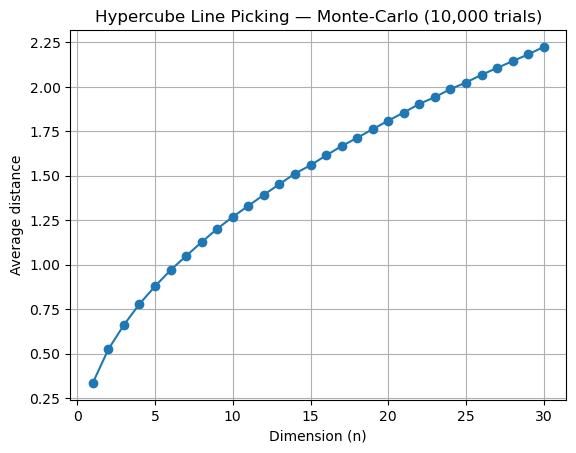

In [4]:
picker.plot()

## Optional: Compare with Theoretical Bounds

The limiting bounds are  

* Low‑$n$: \(\\displaystyle \\frac{1}{3}\\sqrt{n}\)

* High‑$n$: \(\\displaystyle \\sqrt{\\frac{n}{6}}\\left[\\frac13\\Bigl(1+2\\sqrt{1-\\frac{3}{5n}}\\Bigr)\\right]\)

You can add code to compute and overlay these bounds if desired.